In [1]:
import json
import pandas as pd
import numpy as np
import regex as re
import seaborn as sns
from pandarallel import pandarallel
import pathlib
import matplotlib.pyplot as plt

pandarallel.initialize(progress_bar=True)

color= '#003060'

cn = ['#81c4e4', '#943475']

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [2]:
# df = pd.read_json('/Users/landsiedelj/Downloads/hundredthousand_wp_merged_text_cf.jsonl', lines=True, orient='records')
df = pd.read_pickle('/Users/landsiedelj/Downloads/wp_final/WP_article_100K_with_coref_gender_final.pkl')

In [3]:
df.head(2)

,id,article_url,title,author,published_date,type,source,publish_date,orig-id,text_cf,entity,wiki_gender
3,de3d4e52480520b97f9e12cb853cfb39,https://www.washingtonpost.com/news/in-theory/...,A free lunch for the federal government,Josh Bivens,1.472485e+12,blog,The Washington Post,NaN,None,A free lunch for the federal government. Jos...,Donald Trump,male
4,de3d4e52480520b97f9e12cb853cfb39,https://www.washingtonpost.com/news/in-theory/...,A free lunch for the federal government,Josh Bivens,1.472485e+12,blog,The Washington Post,NaN,None,A free lunch for the federal government. Jos...,Hillary Clinton,female


In [5]:
#df.to_pickle('/Users/landsiedelj/washington_post_bias/WP_article_100K_with_gender_final.pkl')

In [1]:
# df.groupby('wiki_gender')["id"].count().sort_values(ascending=False)

Text(0, 0.5, '# Articles')

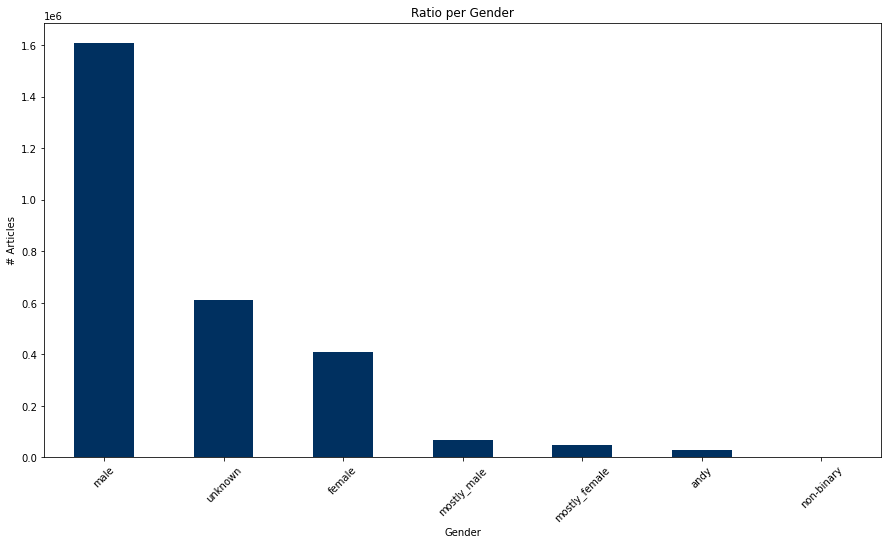

In [7]:
df.groupby('wiki_gender')["id"].count().sort_values(ascending=False).plot(kind='bar', color=color, figsize=(15, 8), rot=45)
plt.title('Ratio per Gender')
plt.xlabel('Gender')
plt.ylabel('# Articles')

In [8]:
# Extract category from URL 

def findCategory(x):
    import numpy as np
    try:
        articleUrl = x.article_url

        if articleUrl[:5] == 'https':
            category = articleUrl.split('/')[3]
        elif articleUrl[:1] == '/':
            category = articleUrl.split('/')[1]
        else:
            category = 'other'
        return category
    except:
        return np.nan

# find category from article_url
df['category'] = df.parallel_apply(findCategory, axis=1)

__Top 5 categories (absolut) - mentions "male"__

Text(0, 0.5, '# articles')

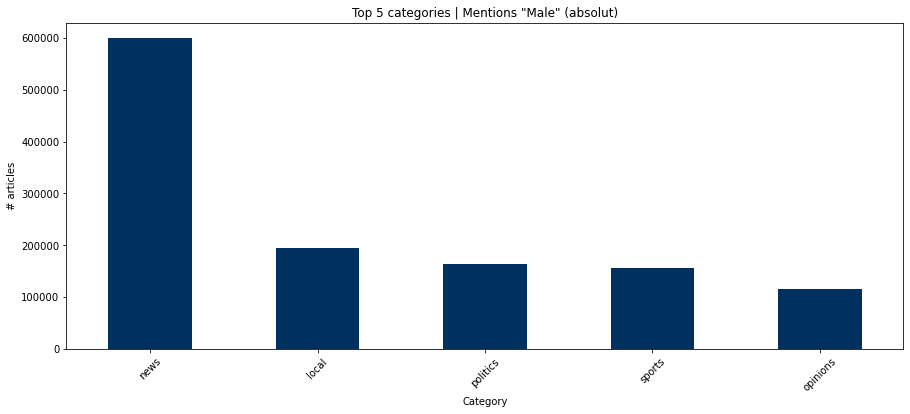

In [9]:
# Top 5 categories (absolut) - mentions "male"
df[df.wiki_gender == 'male'].groupby(['category'])["id"].count().sort_values(ascending=False).head(5).plot(kind='bar', color=color, figsize=(15, 6), rot=45)
plt.title('Top 5 categories | Mentions "Male" (absolut)')
plt.xlabel('Category')
plt.ylabel('# articles')

__Top 5 categories (absolut) - mentions "Female"__

Text(0, 0.5, '# articles')

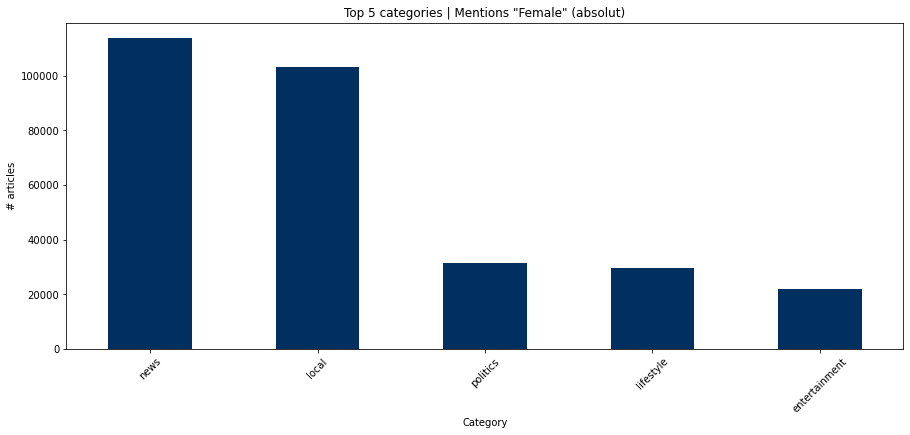

In [10]:
# Top 5 categories (absolut) - mentions "Female"
df[df.wiki_gender == 'female'].groupby(['category'])["id"].count().sort_values(ascending=False).head(5).plot(kind='bar', color=color, figsize=(15, 6), rot=45)
plt.title('Top 5 categories | Mentions "Female" (absolut)')
plt.xlabel('Category')
plt.ylabel('# articles')

In [55]:
df.category.value_counts()[:10]

news             959679
local            429804
sports           254829
politics         241035
opinions         165427
blogs            124023
lifestyle        117167
world            112684
entertainment     95110
business          48171
Name: category, dtype: int64

__Top 5 categories (relative) - mentions "male"__

Text(0, 0.5, '')

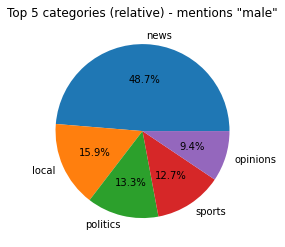

In [58]:
# Top 5 categories (relative) - mentions "male"
top_male = pd.DataFrame(df[df.wiki_gender == 'male'].groupby(['category'])["id"].count().sort_values(ascending=False).head(5))
top_male["total"] = df[df["wiki_gender"] == 'male']["id"].count()
top_male["relative"] = top_male["id"] / top_male["total"] * 100
top_male["relative"].sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 categories (relative) - mentions "male"')
plt.xlabel("")
plt.ylabel("")

__Top 5 categories (relative) - mentions "Female"__

Text(0, 0.5, '')

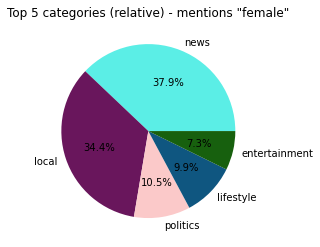

In [62]:
color_ = ['#5beee6', '#69165c', '#fbc9c9', '#0f5680' , '#17600e']
# Top 5 categories (relative) - mentions "Female"
top_female = pd.DataFrame(df[df.wiki_gender == 'female'].groupby(['category'])["id"].count().sort_values(ascending=False).head(5))
top_female["total"] = df[df["wiki_gender"] == 'female']["id"].count()
top_female["relative"] = top_female["id"] / top_female["total"] * 100
top_female["relative"].sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=color_)
plt.title('Top 5 categories (relative) - mentions "female"')
plt.xlabel("")
plt.ylabel("")

In [12]:
# Lists of gender
gender = ["andy", "female", "male", "mostly_female", "mostly_male", "unknown", "non-binary"]
other = ["andy", "mostly_female", "mostly_male", "unknown", "non-binary"]

__Ratio of gender in different categories__

wiki_gender
female     31376
male      164148
Name: id, dtype: int64


Text(0, 0.5, '')

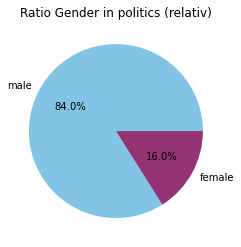

In [14]:
# Ratio Gender in politics
cn = ['#81c4e4', '#943475']
print(df[(~df.wiki_gender.isin(other)) & (df["category"] == 'politics')].groupby('wiki_gender')["id"].count())
df[(~df.wiki_gender.isin(other)) & (df["category"] == 'politics')].groupby('wiki_gender')["id"].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=cn)
plt.title('Ratio Gender in politics (relativ)')
plt.xlabel("")
plt.ylabel("")

wiki_gender
female    113630
male      598895
Name: id, dtype: int64


Text(0, 0.5, '')

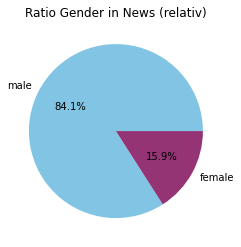

In [15]:
# Ratio Gender in News

print(df[(~df.wiki_gender.isin(other)) & (df["category"] == 'news')].groupby('wiki_gender')["id"].count())
df[(~df.wiki_gender.isin(other)) & (df["category"] == 'news')].groupby('wiki_gender')["id"].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=cn)
plt.title('Ratio Gender in News (relativ)')
plt.xlabel("")
plt.ylabel("")

wiki_gender
female    103198
male      195394
Name: id, dtype: int64


Text(0, 0.5, '')

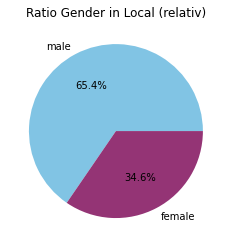

In [16]:
# Ratio Gender in Local
print(df[(~df.wiki_gender.isin(other)) & (df["category"] == 'local')].groupby('wiki_gender')["id"].count())
df[(~df.wiki_gender.isin(other)) & (df["category"] == 'local')].groupby('wiki_gender')["id"].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=cn)
plt.title('Ratio Gender in Local (relativ)')
plt.xlabel("")
plt.ylabel("")

wiki_gender
female     16885
male      155567
Name: id, dtype: int64


Text(0, 0.5, '')

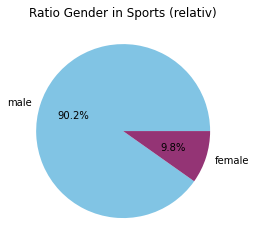

In [17]:
# Ratio Gender in Sports
print(df[(~df.wiki_gender.isin(other)) & (df["category"] == 'sports')].groupby('wiki_gender')["id"].count())
df[(~df.wiki_gender.isin(other)) & (df["category"] == 'sports')].groupby('wiki_gender')["id"].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=cn)
plt.title('Ratio Gender in Sports (relativ)')
plt.xlabel("")
plt.ylabel("")

wiki_gender
female     19296
male      115767
Name: id, dtype: int64


Text(0, 0.5, '')

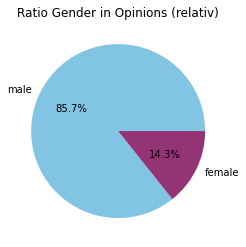

In [18]:
# Ratio Gender in Opinions
print(df[(~df.wiki_gender.isin(other)) & (df["category"] == 'opinions')].groupby('wiki_gender')["id"].count())
df[(~df.wiki_gender.isin(other)) & (df["category"] == 'opinions')].groupby('wiki_gender')["id"].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=cn)
plt.title('Ratio Gender in Opinions (relativ)')
plt.xlabel("")
plt.ylabel("")

wiki_gender
female    19170
male      83035
Name: id, dtype: int64


Text(0, 0.5, '')

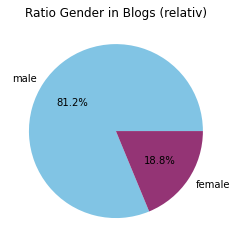

In [19]:
# Ratio Gender in Blogs
print(df[(~df.wiki_gender.isin(other)) & (df["category"] == 'blogs')].groupby('wiki_gender')["id"].count())
df[(~df.wiki_gender.isin(other)) & (df["category"] == 'blogs')].groupby('wiki_gender')["id"].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=cn)
plt.title('Ratio Gender in Blogs (relativ)')
plt.xlabel("")
plt.ylabel("")

wiki_gender
female    29713
male      49272
Name: id, dtype: int64


Text(0, 0.5, '')

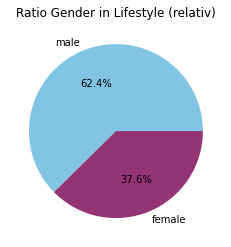

In [20]:
# Ratio Gender in Lifestyle
print(df[(~df.wiki_gender.isin(other)) & (df["category"] == 'lifestyle')].groupby('wiki_gender')["id"].count())
df[(~df.wiki_gender.isin(other)) & (df["category"] == 'lifestyle')].groupby('wiki_gender')["id"].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=cn)
plt.title('Ratio Gender in Lifestyle (relativ)')
plt.xlabel("")
plt.ylabel("")

# Analysis w/ smaller data set

Due to a annoying memory error reducing the data set (count > 3 and drop gender "unknown", also for Top 20 Person drop entities w/out surname (drop Ryan etc. first name or surname))

In [22]:
df_small = df.groupby('entity').filter(lambda x : len(x)>3) # Filter entities with > 3 mentions
#del df_small['entity_type'] # Drop col

In [23]:
# Drop unknown from gender column
df_small = df_small[df_small['wiki_gender'] != 'unknown']
count = df_small['entity'].str.split().str.len()
df_small = df_small[~(count==1)]
print(df_small.shape)

(1491980, 13)


In [ ]:
'''df_small['entity'].value_counts(sort=True).nlargest(10).plot.bar(figsize=(15,6), color=color, rot=30)
#plt.title('Top 10 used keywords overall', fontsize=20)
plt.xlabel('Person', fontsize=18)
plt.ylabel('Number of mentions', fontsize=18)
plt.tick_params(labelsize=16) 
plt.rcParams["axes.labelsize"] = 18'''

'df_small[\'entity\'].value_counts(sort=True).nlargest(10).plot.bar(figsize=(15,6), color=color, rot=30)\n#plt.title(\'Top 10 used keywords overall\', fontsize=20)\nplt.xlabel(\'Person\', fontsize=18)\nplt.ylabel(\'Number of mentions\', fontsize=18)\nplt.tick_params(labelsize=16) \nplt.rcParams["axes.labelsize"] = 18'

<AxesSubplot:xlabel='count', ylabel='entity'>

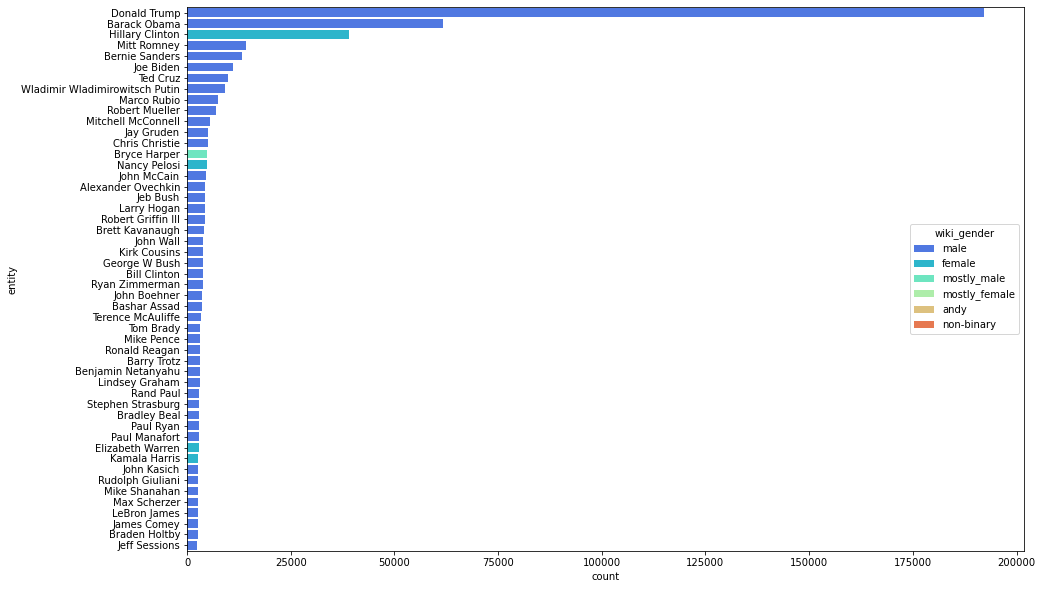

In [69]:
plt.figure(figsize=(15,10))
sns.countplot(y="entity", hue="wiki_gender", data=df_small, palette="rainbow",
              order=df_small.entity.value_counts().iloc[:50].index, dodge=False)

<AxesSubplot:xlabel='count', ylabel='entity'>

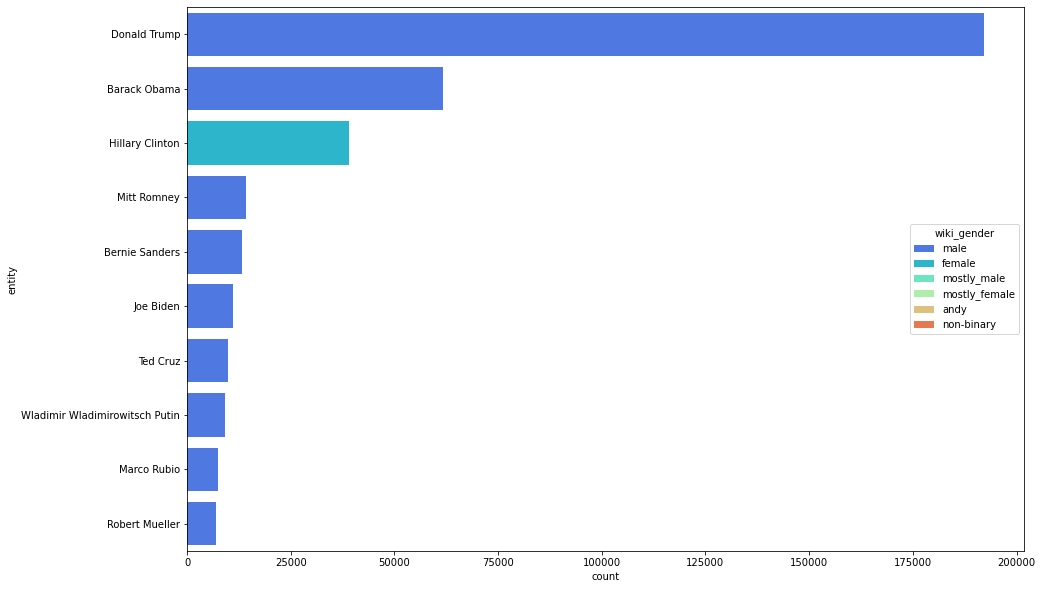

In [68]:
plt.figure(figsize=(15,10))
sns.countplot(y="entity", hue="wiki_gender", data=df_small, palette="rainbow",
              order=df_small.entity.value_counts().iloc[:10].index, dodge=False)

In [25]:
df_small.wiki_gender.value_counts()

male             1197746
female            228852
mostly_male        37684
mostly_female      18876
andy                8517
non-binary           305
Name: wiki_gender, dtype: int64

In [26]:
df_small.head(2)

,id,article_url,title,author,published_date,type,source,publish_date,orig-id,text_cf,entity,wiki_gender,category
3,de3d4e52480520b97f9e12cb853cfb39,https://www.washingtonpost.com/news/in-theory/...,A free lunch for the federal government,Josh Bivens,2016-08-29,blog,The Washington Post,NaN,None,A free lunch for the federal government. Jos...,Donald Trump,male,news
4,de3d4e52480520b97f9e12cb853cfb39,https://www.washingtonpost.com/news/in-theory/...,A free lunch for the federal government,Josh Bivens,2016-08-29,blog,The Washington Post,NaN,None,A free lunch for the federal government. Jos...,Hillary Clinton,female,news


wiki_gender
female     26015
male      145487
Name: id, dtype: int64


Text(0, 0.5, '')

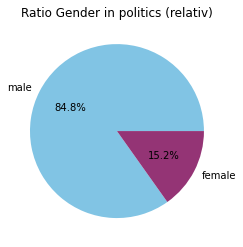

In [27]:
# Ratio Gender in politics
print(df_small[(~df_small.wiki_gender.isin(other)) & (df_small["category"] == 'politics')].groupby('wiki_gender')["id"].count())
df_small[(~df_small.wiki_gender.isin(other)) & (df_small["category"] == 'politics')].groupby('wiki_gender')["id"].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=cn)
plt.title('Ratio Gender in politics (relativ)')
plt.xlabel("")
plt.ylabel("")

wiki_gender
female     79579
male      483399
Name: id, dtype: int64


Text(0, 0.5, '')

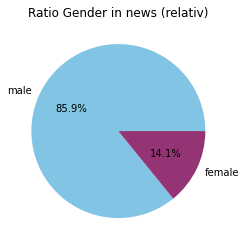

In [28]:
# Ratio Gender in news
print(df_small[(~df_small.wiki_gender.isin(other)) & (df_small["category"] == 'news')].groupby('wiki_gender')["id"].count())
df_small[(~df_small.wiki_gender.isin(other)) & (df_small["category"] == 'news')].groupby('wiki_gender')["id"].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=cn)
plt.title('Ratio Gender in news (relativ)')
plt.xlabel("")
plt.ylabel("")

wiki_gender
female    13144
male      27576
Name: id, dtype: int64


Text(0, 0.5, '')

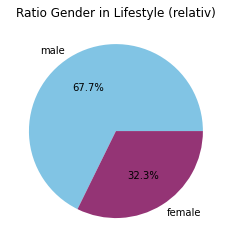

In [29]:
# Ratio Gender in Lifestyle
print(df_small[(~df_small.wiki_gender.isin(other)) & (df_small["category"] == 'lifestyle')].groupby('wiki_gender')["id"].count())
df_small[(~df_small.wiki_gender.isin(other)) & (df_small["category"] == 'lifestyle')].groupby('wiki_gender')["id"].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=cn)
plt.title('Ratio Gender in Lifestyle (relativ)')
plt.xlabel("")
plt.ylabel("")

wiki_gender
female    15276
male      99331
Name: id, dtype: int64


Text(0, 0.5, '')

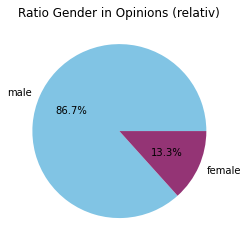

In [64]:
# Ratio Gender in opinions
print(df_small[(~df_small.wiki_gender.isin(other)) & (df_small["category"] == 'opinions')].groupby('wiki_gender')["id"].count())
df_small[(~df_small.wiki_gender.isin(other)) & (df_small["category"] == 'opinions')].groupby('wiki_gender')["id"].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=cn)
plt.title('Ratio Gender in Opinions (relativ)')
plt.xlabel("")
plt.ylabel("")

wiki_gender
female     11250
male      119649
Name: id, dtype: int64


Text(0, 0.5, '')

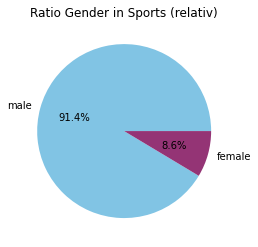

In [67]:
# Ratio Gender in Sports
print(df_small[(~df_small.wiki_gender.isin(other)) & (df_small["category"] == 'sports')].groupby('wiki_gender')["id"].count())
df_small[(~df_small.wiki_gender.isin(other)) & (df_small["category"] == 'sports')].groupby('wiki_gender')["id"].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=cn)
plt.title('Ratio Gender in Sports (relativ)')
plt.xlabel("")
plt.ylabel("")

wiki_gender
female    26374
male      80651
Name: id, dtype: int64


Text(0, 0.5, '')

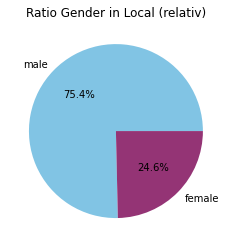

In [65]:
# Ratio Gender in Local
print(df_small[(~df_small.wiki_gender.isin(other)) & (df_small["category"] == 'local')].groupby('wiki_gender')["id"].count())
df_small[(~df_small.wiki_gender.isin(other)) & (df_small["category"] == 'local')].groupby('wiki_gender')["id"].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=cn)
plt.title('Ratio Gender in Local (relativ)')
plt.xlabel("")
plt.ylabel("")

wiki_gender
female    16108
male      74291
Name: id, dtype: int64


Text(0, 0.5, '')

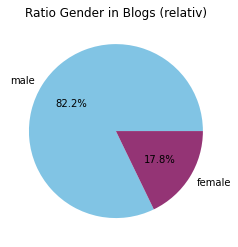

In [66]:
# Ratio Gender in Blogs
print(df_small[(~df_small.wiki_gender.isin(other)) & (df_small["category"] == 'blogs')].groupby('wiki_gender')["id"].count())
df_small[(~df_small.wiki_gender.isin(other)) & (df_small["category"] == 'blogs')].groupby('wiki_gender')["id"].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=cn)
plt.title('Ratio Gender in Blogs (relativ)')
plt.xlabel("")
plt.ylabel("")

<AxesSubplot:>

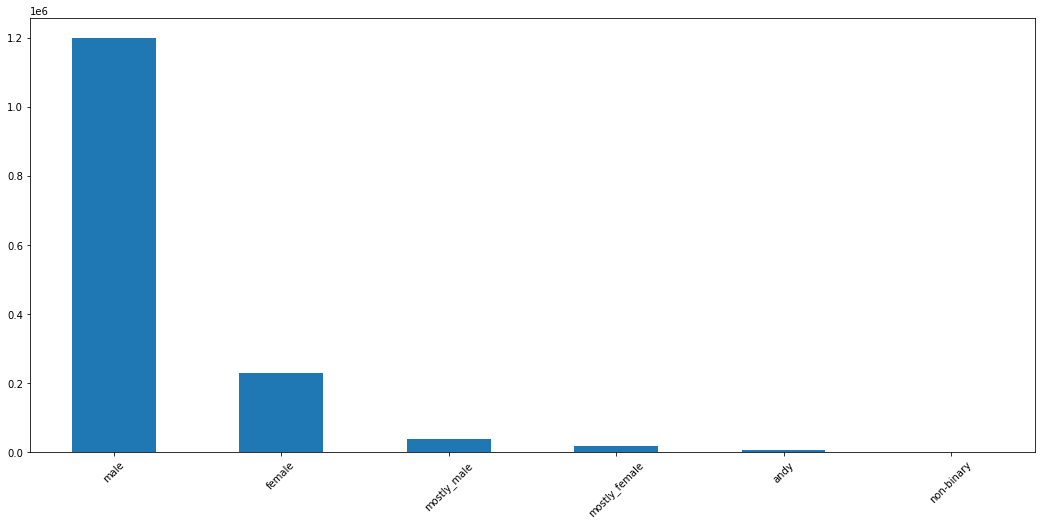

In [42]:
df_small.wiki_gender.value_counts().plot(kind='bar', figsize=(18,8), rot=45)

Text(0, 0.5, '')

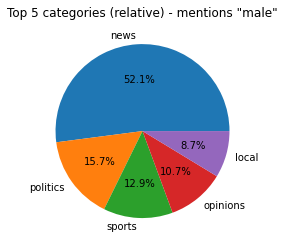

In [43]:
# Top 5 categories (relative) - mentions "male"
top_male = pd.DataFrame(df_small[df_small.wiki_gender == 'male'].groupby(['category'])["id"].count().sort_values(ascending=False).head(5))
top_male["total"] = df_small[df_small["wiki_gender"] == 'male']["id"].count()
top_male["relative"] = top_male["id"] / top_male["total"] * 100
top_male["relative"].sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 categories (relative) - mentions "male"')
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

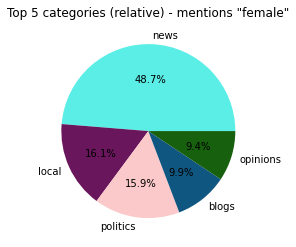

In [44]:
color_ = ['#5beee6', '#69165c', '#fbc9c9', '#0f5680' , '#17600e']
# Top 5 categories (relative) - mentions "Female"
top_female = pd.DataFrame(df_small[df_small.wiki_gender == 'female'].groupby(['category'])["id"].count().sort_values(ascending=False).head(5))
top_female["total"] = df_small[df_small["wiki_gender"] == 'female']["id"].count()
top_female["relative"] = top_female["id"] / top_female["total"] * 100
top_female["relative"].sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', colors=color_)
plt.title('Top 5 categories (relative) - mentions "female"')
plt.xlabel("")
plt.ylabel("")